<a href="https://colab.research.google.com/github/JoelOrlandoHramos/Maestria/blob/main/Actividad%202c/A2c_DL_TC5033_AD2023_Joel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models

In [ ]:
import matplotlib.pyplot as plt

### Descargar sets de datos

In [ ]:

DATA_PATH = '/content/CIFAR'
NUM_TRAIN = 45000
MINIBATCH_SIZE = 64
transform_imagenet = T.Compose([
                T.Resize(224),
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_imagenet)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### Usar GPU

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


### Mostrar imágenes

La imagen muestreada representa un: Ship


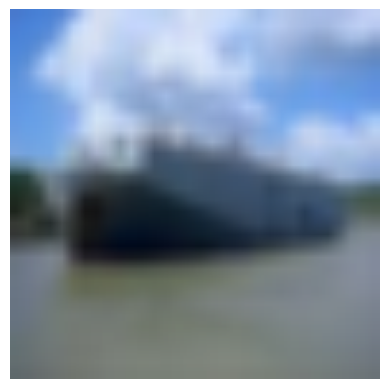

In [ ]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

### Calcular Accuracy

In [ ]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) # mb_size, 10
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            num_correct += (pred == yi).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)
        return float(num_correct)/num_total



## **MODEL 2**
### EfficientNet

This pre-model is based on the neural network published in 2019 by Mingxing Tan and Quoc V. Le. They research for this network was based on model scaling and find that optimizing network depth, width, and resolution in a balanced manner can enhance performance. The result of this research was the creation of a family of networks called EfficeintNet that have substantially less number of parameters when compared with other state-of-the-art deep learning models. The family is made up of 8 models starting from EfficientNetB0 to EfficientNetB7.


According to their paper, their last model achieved "84.3% top-1 accuracy on ImageNet, while being 8.4x smaller and 6.1x faster on inference than the best existing [Convolutional Neural Networks]".

Therefore, we decided to use this model with the CIFAR10 dataset to see its accuracy.

### Cargar modelo pre-cargado

We start by loading the pre-trained model. We are able to easily do this because when we defined and imported the libraries for our activity, we specifically imported the torchvision library that include different models  for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, etc.

In [ ]:
model_efficientnet = models.efficientnet_b7(pretrained=True) #  By setting pretrained = True.
                                                             #  This will automatically download the pre-trained weights for the model.

#### Exploremos el modelo

Now that we have downloaded the model, we should explore what exactly is in it. In the following FOR we are asking the code to enumerate and print the list of the the parameters' shapes and sizes for all layers. We can see that this model has way more layers than ResNet for example.

In [ ]:
for i, w in enumerate(model_efficientnet.parameters()):
    print(i, w.shape, w.requires_grad) #Additionally, w.requires_grad will let us know if gradient calculation is needed.

0 torch.Size([64, 3, 3, 3]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 1, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([16, 64, 1, 1]) True
7 torch.Size([16]) True
8 torch.Size([64, 16, 1, 1]) True
9 torch.Size([64]) True
10 torch.Size([32, 64, 1, 1]) True
11 torch.Size([32]) True
12 torch.Size([32]) True
13 torch.Size([32, 1, 3, 3]) True
14 torch.Size([32]) True
15 torch.Size([32]) True
16 torch.Size([8, 32, 1, 1]) True
17 torch.Size([8]) True
18 torch.Size([32, 8, 1, 1]) True
19 torch.Size([32]) True
20 torch.Size([32, 32, 1, 1]) True
21 torch.Size([32]) True
22 torch.Size([32]) True
23 torch.Size([32, 1, 3, 3]) True
24 torch.Size([32]) True
25 torch.Size([32]) True
26 torch.Size([8, 32, 1, 1]) True
27 torch.Size([8]) True
28 torch.Size([32, 8, 1, 1]) True
29 torch.Size([32]) True
30 torch.Size([32, 32, 1, 1]) True
31 torch.Size([32]) True
32 torch.Size([32]) True
33 torch.Size([32, 1, 3, 3]) True
34 torch.Size([32]) True
35 tor

We continue to explore our model. It is important to understand what is the architecture of the neural network that we will be working with. The following argument will allow us to visualize a list of structure of each layer.

In [ ]:
model_aux = nn.Sequential(*list(model_efficientnet.children())) #We store the architecture of this network since we will be modifying it.
model_aux

Sequential(
  (0): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivation(


We have confirmed that this Neural Network is indeed complicated.

Although it is complicated to meticulously analize each detail for each layer, we do need pay close attention to last layer of this network. Specifically, we need to see the number of out features. We can see that for this layer the output features are 1000. Considering that this model has been pretrained with ImageNet dataset, where we have 1000 output classificaitons, this make a lot of sense. However, on out CIFAR10 dataset, we just have 10 output features. Therefore we need to adjust our model.

#### Ajustar a nuestro modelo

In [ ]:
model_aux = nn.Sequential(*list(model_efficientnet.children())[:-1]) #This annotation mean that to the list we created, we will be deleting the last element.
                                                                    #Meaning the last layer.

We print the model structure to double check the last layer (made up of a Sequential of Dropout follow by a Linear layer) were deleted.

In [ ]:
model_aux

Sequential(
  (0): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivation(


We can see that indeed it was deeleted.

We will now "freeze" the rest of the model. In other words, we are going to stop the gradrient from happening so that the parameters for all of our network don't change while we are training it. We want to keep the exact same gradients that resulted from the pre-trained model.

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

We double check if we deactivated the gradient in all layers.

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


### Loop de entrenamiento

In [ ]:
def train(model, optimiser, epochs=100):
#     def train(model, optimiser, scheduler = None, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)

            cost = F.cross_entropy(input= scores, target=yi)

            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

        acc = accuracy(model, val_loader)
#         if epoch%5 == 0:
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')
#         scheduler.step()

We will now replace the layer we previously deleted with one that helps us get the out_features we are expecting. It is important to mentioned that several other layers can be applied before this las Fully Connected neural layer that we want to add. For example, in our code we will try to add a Flattern ELEMENT and also we will see the effect of adding a Dropout element. This last one because we have seen in literature that the EfficientNet models usually have this Dropout Layer before the linear one, so we want to evaluate the significance of it.

In [ ]:

lr = 5e-4  #when we use this techniques of data transfer, we usually use a really small learning rate.
epochs = 3  #we will just evaluate for 3 epoch to see if it was a good approach.

model1 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Dropout(p=0.5, inplace=True),
                       nn.Linear(in_features=2560, out_features= 10, bias= True))  #Please note that the in_features here matched the outfeatures of the last layer of the pre-trained model we just "adjusted". In this case it is 2560.
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

# train(model1, optimiser, epochs)

In [ ]:
model1

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
              (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_activation): 

 We train our adjusted pre-trained model and evaluate whether it was a good approach for the image classfication of our data set.

In [ ]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 0.8042879104614258, accuracy: 0.7274,
Epoch: 1, costo: 1.5503923892974854, accuracy: 0.747,
Epoch: 2, costo: 0.9670211672782898, accuracy: 0.7544,


We can see that after just three Epoch we have acquired an accuracy of

> 75.44%

Finally, the model is evaluated agains our test data.

In [ ]:
accuracy(model1, test_loader)

0.7598

The accuracy acquired was of
>75.98%